# Testing the quadratic classifier

## Setup

Note: need to use the `quadratic-classifier` branch of MadMiner: https://github.com/diana-hep/madminer/tree/quadratic-classifier

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

%matplotlib inline

import os
import h5py
import logging
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import torch
import time

from madminer.analysis import DataAnalyzer
from madminer.sampling import SampleAugmenter, combine_and_shuffle
from madminer import sampling
#from madminer.ml import ParameterizedRatioEstimator, MorphingAwareRatioEstimator, QuadraticMorphingAwareRatioEstimator 
#from madminer.plotting import plot_distributions, plot_1d_morphing_basis


In [2]:
# MadMiner output
logging.basicConfig(
    format='%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s',
    datefmt='%H:%M',
    level=logging.INFO
)

# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "madminer" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)

## Shuffle dataset just in case

Note that `toy_data_for_madminer.h5` is the file that was called `lhe_data_shuffled.h5` originally.

In [3]:
# combine_and_shuffle(["data/toy_data_for_madminer.h5"], "data/toy_data_for_madminer.h5")

## Let's have a look at the dataset

16:06 madminer.analysis.da INFO    Loading data from data/toy_data_for_madminer.h5
16:06 madminer.analysis.da INFO    Found 1 parameters
16:06 madminer.analysis.da INFO    Did not find nuisance parameters
16:06 madminer.analysis.da INFO    Found 10 benchmarks, of which 10 physical
16:06 madminer.analysis.da INFO    Found 9 observables
16:06 madminer.analysis.da INFO    Found 6000000 events
16:06 madminer.analysis.da INFO      3000000 signal events sampled from benchmark sm
16:06 madminer.analysis.da INFO      500000 signal events sampled from benchmark 50
16:06 madminer.analysis.da INFO      500000 signal events sampled from benchmark 200
16:06 madminer.analysis.da INFO      500000 signal events sampled from benchmark 500
16:06 madminer.analysis.da INFO      500000 signal events sampled from benchmark neg_50
16:06 madminer.analysis.da INFO      500000 signal events sampled from benchmark neg_200
16:06 madminer.analysis.da INFO      500000 signal events sampled from benchmark neg_500
16

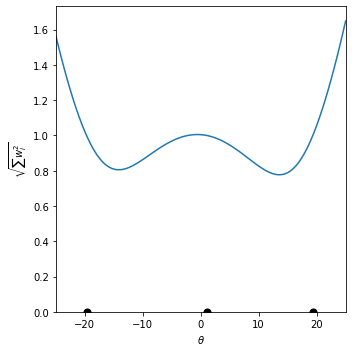

In [4]:
analyzer = DataAnalyzer("data/toy_data_for_madminer.h5")
_ = plot_1d_morphing_basis(analyzer.morpher, xrange=(-25, 25))

In [5]:
# _ = plot_distributions("data/toy_data_for_madminer.h5", uncertainties="none")

## Prepare training data

In [6]:
sampler = SampleAugmenter('data/toy_data_for_madminer.h5')

16:06 madminer.analysis.da INFO    Loading data from data/toy_data_for_madminer.h5
16:06 madminer.analysis.da INFO    Found 1 parameters
16:06 madminer.analysis.da INFO    Did not find nuisance parameters
16:06 madminer.analysis.da INFO    Found 10 benchmarks, of which 10 physical
16:06 madminer.analysis.da INFO    Found 9 observables
16:06 madminer.analysis.da INFO    Found 6000000 events
16:06 madminer.analysis.da INFO      3000000 signal events sampled from benchmark sm
16:06 madminer.analysis.da INFO      500000 signal events sampled from benchmark 50
16:06 madminer.analysis.da INFO      500000 signal events sampled from benchmark 200
16:06 madminer.analysis.da INFO      500000 signal events sampled from benchmark 500
16:06 madminer.analysis.da INFO      500000 signal events sampled from benchmark neg_50
16:06 madminer.analysis.da INFO      500000 signal events sampled from benchmark neg_200
16:06 madminer.analysis.da INFO      500000 signal events sampled from benchmark neg_500
16

In [7]:
x, theta, _, y, _, _, _ = sampler.sample_train_ratio(
    theta0=sampling.benchmarks(list(sampler.benchmarks.keys())),
    theta1=sampling.benchmark("sm"),
    test_split=0.01,
    validation_split=0.25,
    n_samples=1000000,
)

16:06 madminer.sampling.sa INFO    Extracting training sample for ratio-based methods. Numerator hypothesis: 10 benchmarks, starting with ['morphing_basis_vector_0', 'morphing_basis_vector_1', 'morphing_basis_vector_2'], denominator hypothesis: sm
16:06 madminer.sampling.sa INFO    Starting sampling serially
16:06 madminer.sampling.sa INFO    Sampling from parameter point 1 / 10
16:06 madminer.sampling.sa INFO    Sampling from parameter point 2 / 10
16:06 madminer.sampling.sa INFO    Sampling from parameter point 3 / 10
16:06 madminer.sampling.sa INFO    Sampling from parameter point 4 / 10
16:06 madminer.sampling.sa INFO    Sampling from parameter point 5 / 10
16:06 madminer.sampling.sa INFO    Sampling from parameter point 6 / 10
16:06 madminer.sampling.sa INFO    Sampling from parameter point 7 / 10
16:06 madminer.sampling.sa INFO    Sampling from parameter point 8 / 10
16:06 madminer.sampling.sa INFO    Sampling from parameter point 9 / 10
16:06 madminer.sampling.sa INFO    Samplin

In [47]:
x_val, theta_val, _, y_val, _, _, _ = sampler.sample_train_ratio(
    theta0=sampling.benchmarks(list(sampler.benchmarks.keys())),
    theta1=sampling.benchmark("sm"),
    test_split=0.0,
    validation_split=0.25,
    n_samples=100000,
    partition="validation"
)

16:25 madminer.sampling.sa INFO    Extracting training sample for ratio-based methods. Numerator hypothesis: 10 benchmarks, starting with ['morphing_basis_vector_0', 'morphing_basis_vector_1', 'morphing_basis_vector_2'], denominator hypothesis: sm
16:25 madminer.sampling.sa INFO    Starting sampling serially
16:25 madminer.sampling.sa INFO    Sampling from parameter point 1 / 10
16:25 madminer.sampling.sa INFO    Sampling from parameter point 2 / 10
16:25 madminer.sampling.sa INFO    Sampling from parameter point 3 / 10
16:25 madminer.sampling.sa INFO    Sampling from parameter point 4 / 10
16:25 madminer.sampling.sa INFO    Sampling from parameter point 5 / 10
16:25 madminer.sampling.sa INFO    Sampling from parameter point 6 / 10
16:25 madminer.sampling.sa INFO    Sampling from parameter point 7 / 10
16:25 madminer.sampling.sa INFO    Sampling from parameter point 8 / 10
16:25 madminer.sampling.sa INFO    Sampling from parameter point 9 / 10
16:25 madminer.sampling.sa INFO    Samplin

## Training

In [49]:
model_kwargs = {"n_hidden": (100, 100)}
train_kwargs = {
    "method": "carl",
    "x": x, "y": y, "theta": theta,
    "x_val":x_val, "y_val": y_val, "theta_val": theta_val,
    "optimizer": "adam", "batch_size": 200
}

### Train morphing-aware estimator

In [50]:
morphing_aware = MorphingAwareRatioEstimator(
    **model_kwargs, morphing_setup_filename="data/toy_data_for_madminer.h5", optimize_morphing_basis=False
)
_ = morphing_aware.train(**train_kwargs)

16:25 madminer.ml.morphing INFO    Setting up morphing-aware ratio estimator with 3 morphing components
16:25 madminer.ml.paramete INFO    Starting training
16:25 madminer.ml.paramete INFO      Method:                 carl
16:25 madminer.ml.paramete INFO      Batch size:             200
16:25 madminer.ml.paramete INFO      Optimizer:              adam
16:25 madminer.ml.paramete INFO      Epochs:                 50
16:25 madminer.ml.paramete INFO      Learning rate:          0.001 initially, decaying to 0.0001
16:25 madminer.ml.paramete INFO      Validation split:       0.25
16:25 madminer.ml.paramete INFO      Early stopping:         True
16:25 madminer.ml.paramete INFO      Scale inputs:           True
16:25 madminer.ml.paramete INFO      Scale parameters:       False
16:25 madminer.ml.paramete INFO      Shuffle labels          False
16:25 madminer.ml.paramete INFO      Samples:                all
16:25 madminer.ml.paramete INFO    Loading training data
16:25 madminer.ml.paramete INFO

### Train squared estimator

In [51]:
quadratic = QuadraticMorphingAwareRatioEstimator(**model_kwargs)
_ = quadratic.train(**train_kwargs)

16:53 madminer.ml.paramete INFO    Starting training
16:53 madminer.ml.paramete INFO      Method:                 carl
16:53 madminer.ml.paramete INFO      Batch size:             200
16:53 madminer.ml.paramete INFO      Optimizer:              adam
16:53 madminer.ml.paramete INFO      Epochs:                 50
16:53 madminer.ml.paramete INFO      Learning rate:          0.001 initially, decaying to 0.0001
16:53 madminer.ml.paramete INFO      Validation split:       0.25
16:53 madminer.ml.paramete INFO      Early stopping:         True
16:53 madminer.ml.paramete INFO      Scale inputs:           True
16:53 madminer.ml.paramete INFO      Scale parameters:       False
16:53 madminer.ml.paramete INFO      Shuffle labels          False
16:53 madminer.ml.paramete INFO      Samples:                all
16:53 madminer.ml.paramete INFO    Loading training data
16:53 madminer.ml.paramete INFO    Found 1000000 samples with 1 parameters and 9 observables
16:53 madminer.ml.paramete INFO    Found 1

### Train agnostic parameterized estimator

In [52]:
agnostic = ParameterizedRatioEstimator(**model_kwargs)
_ = agnostic.train(**train_kwargs)

17:14 madminer.ml.paramete INFO    Starting training
17:14 madminer.ml.paramete INFO      Method:                 carl
17:14 madminer.ml.paramete INFO      Batch size:             200
17:14 madminer.ml.paramete INFO      Optimizer:              adam
17:14 madminer.ml.paramete INFO      Epochs:                 50
17:14 madminer.ml.paramete INFO      Learning rate:          0.001 initially, decaying to 0.0001
17:14 madminer.ml.paramete INFO      Validation split:       0.25
17:14 madminer.ml.paramete INFO      Early stopping:         True
17:14 madminer.ml.paramete INFO      Scale inputs:           True
17:14 madminer.ml.paramete INFO      Scale parameters:       True
17:14 madminer.ml.paramete INFO      Shuffle labels          False
17:14 madminer.ml.paramete INFO      Samples:                all
17:14 madminer.ml.paramete INFO    Loading training data
17:14 madminer.ml.paramete INFO    Found 1000000 samples with 1 parameters and 9 observables
17:14 madminer.ml.paramete INFO    Found 10

### Random baseline

In [53]:
random = ParameterizedRatioEstimator(**model_kwargs)
_ = random.train(shuffle_labels=True, **train_kwargs, n_epochs=5)

17:30 madminer.ml.paramete INFO    Starting training
17:30 madminer.ml.paramete INFO      Method:                 carl
17:30 madminer.ml.paramete INFO      Batch size:             200
17:30 madminer.ml.paramete INFO      Optimizer:              adam
17:30 madminer.ml.paramete INFO      Epochs:                 5
17:30 madminer.ml.paramete INFO      Learning rate:          0.001 initially, decaying to 0.0001
17:30 madminer.ml.paramete INFO      Validation split:       0.25
17:30 madminer.ml.paramete INFO      Early stopping:         True
17:30 madminer.ml.paramete INFO      Scale inputs:           True
17:30 madminer.ml.paramete INFO      Scale parameters:       True
17:30 madminer.ml.paramete INFO      Shuffle labels          True
17:30 madminer.ml.paramete INFO      Samples:                all
17:30 madminer.ml.paramete INFO    Loading training data
17:30 madminer.ml.paramete INFO    Found 1000000 samples with 1 parameters and 9 observables
17:30 madminer.ml.paramete INFO    Found 1000

## Evaluation

### Evaluation functions based on TestEstimatorLight.ipynb

In [3]:
def compute_t_original(model, theta, nev, counter, test_input, NSM, NBSM):
    """ Original test statistic, but fixing the likelihood ratio evaluation to be at the correct parameter point """
    
    # computing test statistics t (or lambda) in equation (2) of paper
    
    # generate number of points for testing under Poisson distribution
    n_gen = 0
    while n_gen == 0:
        n_gen = np.random.poisson(nev)

    # stop if there are no more points to test
    if (counter + n_gen) >= len(test_input):
        return 0., -1

    points = test_input[int(counter): int(counter+n_gen)]

    # compute test statistics
    log_ratio = model.evaluate_log_likelihood_ratio(points.numpy(), np.array([[theta]]))[0][0]
    log_ratio = torch.tensor(log_ratio)
    out  = 2 * (NBSM - NSM - (log_ratio + torch.log(torch.tensor(NBSM/NSM))).sum(0))

    #return test statistics and the starting point for the next batch
    return out, int(counter + n_gen)


def compute_t_modified(model, theta, nev, counter, test_input):
    """ Kinematics-only test statistic """
    
    # generate number of points for testing under Poisson distribution
    n_gen = 0
    while n_gen == 0:
        n_gen = np.random.poisson(nev)
    n_gen = max(n_gen, 1000)

    # stop if there are no more points to test
    if (counter + n_gen) >= len(test_input):
        return 0., -1

    points = test_input[int(counter): int(counter+n_gen)]

    # compute test statistics
    log_ratio = model.evaluate_log_likelihood_ratio(points.numpy(), np.array([[theta]]))[0][0]
    t = -2.0 * nev * np.mean(log_ratio)  # Rescale to number of expected events to remove xsec influence
    
    return t, int(counter + n_gen)


def hypo_test(
    model, theta, test_input_sm, test_input_bsm, epochs, e, n_meas, pm, NSM, NBSM, verbose_t=True, verbose_period_t=1e5, title='', include_xsec=False,
):
    test_start = time.time()
    if verbose_t:
        print("NSM = %.3f --- NBSM = %.3f"%(NSM, NBSM))
    tsm  = torch.empty(n_meas)
    tbsm = torch.empty(n_meas)

    # empty array to store values
    tsmcount  = torch.zeros(n_meas+1)
    tbsmcount = torch.zeros(n_meas+1)

    for i in range(n_meas):
        if include_xsec:
            tsm[i], tsmcount[i+1] = compute_t_original(model, theta, NSM, tsmcount[i], test_input_sm, NSM=NSM, NBSM=NBSM)
            tbsm[i], tbsmcount[i+1] = compute_t_original(model, theta, NBSM, tbsmcount[i], test_input_bsm, NSM=NSM, NBSM=NBSM)
        else:
            tsm[i], tsmcount[i+1] = compute_t_modified(model, theta, NSM, tbsmcount[i], test_input_sm)
            tbsm[i], tbsmcount[i+1] = compute_t_modified(model, theta, NSM, tbsmcount[i], test_input_bsm)

        if (tsmcount[i+1] < 0) or (tbsmcount[i+1] < 0):
            if verbose_t: 
                print('Reaching the end of test data. Stop tests at %d. '%i)
            tsm, tbsm = tsm[: i], tbsm[: i]
            n_meas = i
            break

        if verbose_t and i % (verbose_period_t) == 0:
            print('test %s: tsm = %.3f,  tbsm = %.3f'%(str(i).ljust(4), tsm[i], tbsm[i]))

    test_duration = time.time() - test_start

    # compute mean and variation of the test statistics in two hypotheses
    mu_sm     = tsm.mean().item()
    mu_bsm    = tbsm.mean().item()
    sigma_sm  = tsm.std().item()
    sigma_bsm = tbsm.std().item()
    med_sm    = tsm.median().item()

    # compute separation and p-value
    sep    = (mu_sm - mu_bsm)/sigma_bsm
    p      = 1.*len([i for i in tbsm if i > med_sm])/len(tsm) 
    delta1 = (p * (1 - p)/n_meas)**0.5
    delta2 = (sigma_sm/sigma_bsm) * np.exp(-((mu_bsm - mu_sm)**2)/(2 * sigma_bsm**2))/(2*(n_meas**0.5))
    
    deltap = (delta1**2 + delta2**2)**0.5

    if verbose_t:
        print('===> delta1 = %.3f, delta2 = %.3f'%(delta1, delta2))
        print('p = %.3f +/- %.3f' %(p, deltap))
        print('Separation = %.2f sigmas'%(sep))
        training_properties = '/toydata/madminer-carl-'+title
        plot_histogram(tsm, tbsm, int(NSM), int(NBSM), p, deltap, sep, epochs, e, training_properties, results_path)
        print('Partial test after %d epochs (took %.2f seconds)\n'%(e, test_duration))

    # return tsm, tbsm, NSM, NBSM
    return p, sep


In [12]:
def test(estimator, gphival=50, gphi_fname='50', include_xsec=False, n_meas=4000):  #Wilson coefficient value (*10^-2 TeV^-2)
    #toy data file path
    with h5py.File(os.getcwd() + '/toydata/gphi_toydata_test_%s_out.h5'%(gphi_fname), 'r') as f:
        Data = np.array(f['Data'])
        Labels = np.array(f['Labels'])
        NSM = np.array(f['NSM'])
        NBSMList = np.array(f['NBSMList'])
        NBSM = NBSMList[0]
        
        print(NSM)
        print(NBSM)

    #randomise
    Idx_test = torch.randperm(len(Data))
    Data_test = torch.Tensor(Data[Idx_test])
    Label_test = torch.Tensor(Labels[Idx_test])

    #select data from each hypothesis
    SM_Data  = Data_test[Label_test==0, :]
    BSM_Data = Data_test[Label_test==1, :]

    #for plotting/ printing
    n_epochs = current_epoch = int(1e4)
    results_path = os.getcwd()
    charge = 'plus'
    
    # MadMiner parameter normalization
    theta = 0.9399 / 50 * gphival

    p, sep = hypo_test(
        estimator, theta, SM_Data, BSM_Data, n_epochs, current_epoch, n_meas, charge,
        verbose_t=False, verbose_period_t=1e5, title='gphi%d_new'%(gphival), NSM=NSM, NBSM=NBSM, include_xsec=include_xsec
    )
        
    return p, sep


In [9]:
from madminer import ParameterizedRatioEstimator
from madminer.ml.morphing_aware import MorphingAwareRatioEstimator


estimator = MorphingAwareRatioEstimator(
    morphing_setup_filename=os.getcwd()+'/data/setup.h5',
    n_hidden=(60,60),
    activation="tanh",)

model = estimator.load(os.getcwd()+'/models/carl10-bigbatch')

p, sep = test(model, '6e-3', include_xsec=False)

20:21 madminer.ml.morphing INFO    Setting up morphing-aware ratio estimator with 3 morphing components
20:21 madminer.ml.base     INFO    Loading model from /madminer/madminer/examples/tutorial_particle_physics/models/carl10-bigbatch
20:21 madminer.ml.base     WARNING Parameter scaling information not found in /madminer/madminer/examples/tutorial_particle_physics/models/carl10-bigbatch


2225.5037678738263
2284.0421363853184


TypeError: can't multiply sequence by non-int of type 'float'

### Evaluate all models, with and without cross section effects

In [56]:
models = {"quadratic": quadratic, "morphing-aware": morphing_aware, "agnostic": agnostic, "random": random}
gphis = [5, 10, 20, 30, 40, 45, 50, 200, 500]

pvals = {key:[] for key in models.keys()}
seps = {key:[] for key in models.keys()}

for key, model in models.items():
    for gphi in gphis:
        p, sep = test(model, gphi, include_xsec=False)
        
        print(f"{key} for g_phi = {gphi}: p = {p}, sep = {sep}")
        pvals[key].append(p)
        seps[key].append(sep)


quadratic for g_phi = 5: p = 0.4605, sep = 0.1059121360585815
quadratic for g_phi = 10: p = 0.4275, sep = 0.17704975194358652
quadratic for g_phi = 20: p = 0.35975, sep = 0.37412015640255114
quadratic for g_phi = 30: p = 0.27225, sep = 0.5632854480605051
quadratic for g_phi = 40: p = 0.20875, sep = 0.7006092155142076
quadratic for g_phi = 45: p = 0.19075, sep = 0.7629671483119467
quadratic for g_phi = 50: p = 0.18025, sep = 0.8284891044786227
quadratic for g_phi = 200: p = 0.00125, sep = 2.3304304901495807
quadratic for g_phi = 500: p = 0.00025, sep = 3.6502129974428503
morphing-aware for g_phi = 5: p = 0.47325, sep = 0.06396665050004251
morphing-aware for g_phi = 10: p = 0.424, sep = 0.1762729085251339
morphing-aware for g_phi = 20: p = 0.375, sep = 0.31531835237258565
morphing-aware for g_phi = 30: p = 0.29275, sep = 0.5161449975456953
morphing-aware for g_phi = 40: p = 0.225, sep = 0.6639995819813942
morphing-aware for g_phi = 45: p = 0.2075, sep = 0.7533180441939995
morphing-aware 

In [57]:
pvals_with_xsec = {key:[] for key in models.keys()}
seps_with_xsec = {key:[] for key in models.keys()}

for key, model in models.items():
    for gphi in gphis:
        p, sep = test(model, gphi, include_xsec=True)
        
        print(f"{key} for g_phi = {gphi}: p = {p}, sep = {sep}")
        pvals_with_xsec[key].append(p)
        seps_with_xsec[key].append(sep)


quadratic for g_phi = 5: p = 0.0091324200913242, sep = 2.156249067642847
quadratic for g_phi = 10: p = 0.0, sep = 4.017805352816178
quadratic for g_phi = 20: p = 0.0, sep = 7.181279288627266
quadratic for g_phi = 30: p = 0.0, sep = 10.537343623977943
quadratic for g_phi = 40: p = 0.0, sep = 12.589139805946788
quadratic for g_phi = 45: p = 0.0, sep = 14.550243155883475
quadratic for g_phi = 50: p = 0.0, sep = 15.285524261766955
quadratic for g_phi = 200: p = 0.0, sep = 49.82163349759285
quadratic for g_phi = 500: p = 0.0, sep = 137.80754731499692
morphing-aware for g_phi = 5: p = 0.3105022831050228, sep = 0.45577044133980626
morphing-aware for g_phi = 10: p = 0.018604651162790697, sep = 2.068196247950657
morphing-aware for g_phi = 20: p = 0.0, sep = 5.060923577504371
morphing-aware for g_phi = 30: p = 0.0, sep = 8.991340621136636
morphing-aware for g_phi = 40: p = 0.0, sep = 12.098425405656048
morphing-aware for g_phi = 45: p = 0.0, sep = 13.808479263894094
morphing-aware for g_phi = 50

## Plot results

In [59]:
colors = ["C1", "C0", "C3", "0.6"]
linestyles = ["-.", "--", "-", ":"]

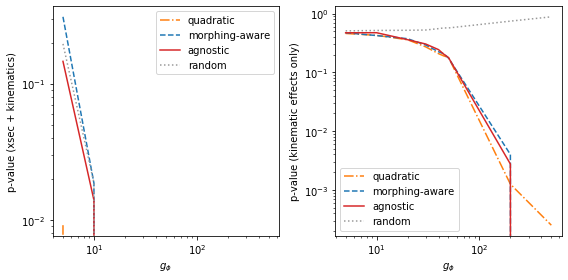

In [63]:
data_sets = [pvals_with_xsec, pvals]
panel_labels = ["p-value (xsec + kinematics)", "p-value (kinematic effects only)"]

fig = plt.figure(figsize=(8,4))

for panel, (data, label) in enumerate(zip(data_sets, panel_labels)):
    ax = plt.subplot(1,2,panel+1)

    for c, ls, (key, datum) in zip(colors, linestyles, data.items()):
        plt.plot(gphis, datum, label=key, ls=ls, c=c)
    
    plt.legend()

    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel(f"$g_\phi$")
    plt.ylabel(label)

plt.tight_layout()
plt.savefig("quadratic_test_pvals.pdf")


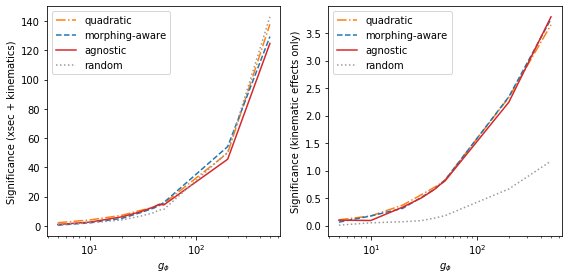

In [68]:
data_sets = [seps_with_xsec, seps]
panel_labels = ["Significance (xsec + kinematics)", "Significance (kinematic effects only)"]

fig = plt.figure(figsize=(8,4))

for panel, (data, label) in enumerate(zip(data_sets, panel_labels)):
    ax = plt.subplot(1,2,panel+1)

    for c, ls, (key, datum) in zip(colors, linestyles, data.items()):
        plt.plot(gphis, np.abs(datum), label=key, ls=ls, c=c)
    
    plt.legend()

    plt.xscale("log")
    # plt.yscale("log")
    plt.xlabel(f"$g_\phi$")
    plt.ylabel(label)

plt.tight_layout()
plt.savefig("quadratic_test_significance.pdf")
